# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned2.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [5]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [6]:
# Your code here - Split into train and test
train, test = train_test_split(df)

print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
8953,-0.252567,36.5878,-0.063378,-0.306741,-0.667489,-0.204063,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3532,-0.453480,19.1520,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3558,-0.605066,3.3120,4.572641,-0.655279,0.576116,0.600671,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7871,-0.475135,12.1878,-0.286801,0.738870,0.576116,0.922564,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7879,-0.427012,36.5878,0.299683,-0.132473,-0.045687,0.117830,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     552.2
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:04   Log-Likelihood:                -40519.
No. Observations:                8152   AIC:                         8.123e+04
Df Residuals:                    8057   BIC:                         8.189e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2098      1.868     34.372      0.000      60.548      67.872
piece_count                                         74.5539      0.900     82.861      0.000      72.790      76.318
num_reviews                                          6.5431      0.685      9.557      0.000       5.201       7.885
play_star_rating                                     5.8982      0.625      9.432      0.000       4.672       7.124
star_rating                                         -1.8504      0.708     -2.615      0.009      -3.237      -0.463
val_star_rating                                     -8.6161      0.633    -13.611      0.000      -9.857      -7.375
ages_10plus                                        122.7196      6.574     18.666      0.000     109.832     135.607
ages_10_14                                         -25.3457      8.956     -2.830      0.005     -42.902      -7.789
ages_10_16                                         -12.6547      4.105     -3.083      0.002     -20.702      -4.607
ages_10_21                                          54.7341      7.308      7.489      0.000      40.408      69.060
ages_11_16                                         -12.8671      6.026     -2.135      0.033     -24.680      -1.054
ages_12plus                                         69.5717      5.570     12.490      0.000      58.653      80.490
ages_12_16                                         -59.3283      7.405     -8.012      0.000     -73.843     -44.813
ages_14plus                                         28.8796      4.126      6.999      0.000      20.791      36.968
ages_16plus                                         30.3977      6.074      5.004      0.000      18.491      42.305
ages_1half_3                                        -8.7606      2.435     -3.598      0.000     -13.533      -3.988
ages_1half_5                                        -4.1994      2.992     -1.404      0.160     -10.064       1.666
ages_2_5                                            14.2976      1.709      8.366      0.000      10.948      17.648
ages_4plus                                         -18.5464      6.012     -3.085      0.002     -30.330      -6.762
ages_4_7                                            -6.0174      3.526     -1.707      0.088     -12.929       0.894
ages_4_99                                           -2.9030      3.486     -0.833      0.405      -9.737       3.931
ages_5plus                                         -10.0833      3.201     -3.150      0.002     -16.358      -3.809
ages_5_12                                          -35.8229      3.283    -10.912      0.000     -42.258     -29.388
ages_5_8                                 

### Side note:

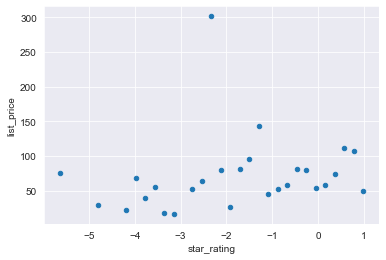

In [26]:
df.groupby('star_rating').mean().reset_index().plot.scatter('star_rating', 'list_price');

Considered categorising ratings but there isn't a complete set of values, and it has a low p-value anyway: 0.009. And with that ~300 value -could do more harm than good.

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [91]:
# Your code here - Remove features which do not appear to be statistically relevant
#Removing columns with high p-values
pv = pd.DataFrame(model.pvalues)
pv = pv.drop('Intercept').reset_index().rename(columns= 
                                               {0:'p_value', 'index': 'cols'})
x2_cols = list(pv[pv.p_value <= 0.05].cols)

In [92]:
# Your code here - Refit the model
predictors = '+'.join(x2_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     731.4
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:50:50   Log-Likelihood:                -40527.
No. Observations:                8152   AIC:                         8.120e+04
Df Residuals:                    8080   BIC:                         8.170e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.4801      1.527     41.562      0.000      60.486      66.474
piece_count                                         74.7047      0.884     84.480      0.000      72.971      76.438
num_reviews                                          6.6804      0.677      9.871      0.000       5.354       8.007
play_star_rating                                     5.9773      0.611      9.775      0.000       4.779       7.176
star_rating                                         -1.7312      0.691     -2.506      0.012      -3.085      -0.377
val_star_rating                                     -8.6332      0.603    -14.308      0.000      -9.816      -7.450
ages_10plus                                        130.2976      7.379     17.658      0.000     115.833     144.762
ages_10_14                                         -19.5098      9.253     -2.108      0.035     -37.649      -1.371
ages_10_16                                          -7.3673      3.863     -1.907      0.057     -14.940       0.205
ages_10_21                                          62.4116      7.934      7.867      0.000      46.860      77.963
ages_11_16                                          -7.9649      5.825     -1.367      0.172     -19.384       3.454
ages_12plus                                         75.5154      6.491     11.634      0.000      62.792      88.239
ages_12_16                                         -54.1021      7.725     -7.004      0.000     -69.245     -38.960
ages_14plus                                         34.2728      4.693      7.303      0.000      25.073      43.472
ages_16plus                                         35.0121      6.810      5.141      0.000      21.662      48.362
ages_1half_3                                        -1.6290      3.129     -0.521      0.603      -7.762       4.504
ages_2_5                                            21.1072      2.002     10.544      0.000      17.183      25.031
ages_4plus                                         -17.5845      9.212     -1.909      0.056     -35.643       0.474
ages_5plus                                          -8.2235      3.130     -2.628      0.009     -14.358      -2.088
ages_5_12                                          -29.7567      2.697    -11.033      0.000     -35.043     -24.470
ages_6plus                                         -20.0842      5.890     -3.410      0.001     -31.629      -8.539
ages_6_12                                          -15.9607      1.869     -8.539      0.000     -19.625     -12.297
ages_7_12                                          -14.2952      2.188     -6.534      0.000     -18.584     -10.007
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [98]:
# Your code here - Continue to refine the model
while True:
    
    pv = pd.DataFrame(model2.pvalues)
    pv = pv.drop('Intercept').reset_index().rename(columns= 
                                                {0:'p_value', 'index': 'cols'})
    x2_cols = list(pv[pv.p_value <= 0.05].cols)
    if len(x2_cols) == len(pv):
        break
    # Your code here - Refit the model
    predictors = '+'.join(x2_cols)
    formula = outcome + '~' + predictors
    model2 = ols(formula=formula, data=train).fit()
    
model2.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     941.2
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:59:24   Log-Likelihood:                -40545.
No. Observations:                8152   AIC:                         8.120e+04
Df Residuals:                    8096   BIC:                         8.159e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.7806      1.149     55.502      0.000      61.528      66.033
piece_count                                         74.2361      0.804     92.331      0.000      72.660      75.812
num_reviews                                          6.0578      0.621      9.756      0.000       4.841       7.275
play_star_rating                                     6.2675      0.602     10.411      0.000       5.087       7.448
star_rating                                         -1.9147      0.687     -2.787      0.005      -3.261      -0.568
val_star_rating                                     -8.7418      0.600    -14.565      0.000      -9.918      -7.565
ages_10plus                                        133.3988      7.276     18.334      0.000     119.136     147.662
ages_10_21                                          63.9222      7.904      8.087      0.000      48.428      79.417
ages_12plus                                         81.0844      6.150     13.185      0.000      69.029      93.140
ages_12_16                                         -46.4647      7.342     -6.328      0.000     -60.858     -32.072
ages_14plus                                         43.2021      3.807     11.349      0.000      35.740      50.664
ages_16plus                                         44.2043      5.964      7.411      0.000      32.513      55.896
ages_2_5                                            22.4927      1.842     12.214      0.000      18.883      26.103
ages_5plus                                          -7.6738      3.111     -2.467      0.014     -13.771      -1.576
ages_5_12                                          -27.9685      2.578    -10.850      0.000     -33.022     -22.915
ages_6plus                                         -18.3907      5.832     -3.153      0.002     -29.824      -6.958
ages_6_12                                          -13.5901      1.575     -8.630      0.000     -16.677     -10.503
ages_7_12                                          -12.1327      1.941     -6.251      0.000     -15.937      -8.328
ages_7_14                                           -8.4420      1.669     -5.058      0.000     -11.714      -5.170
ages_8plus                                          21.0870      5.049      4.177      0.000      11.190      30.984
ages_8_12                                          -11.8160      2.495     -4.737      0.000     -16.706      -6.926
ages_8_14                                           -6.7961      1.620     -4.196      0.000      -9.971      -3.621
ages_9plus                                         109.6644     11.210      9.783      0.000      87.690     131.639
ages_9_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

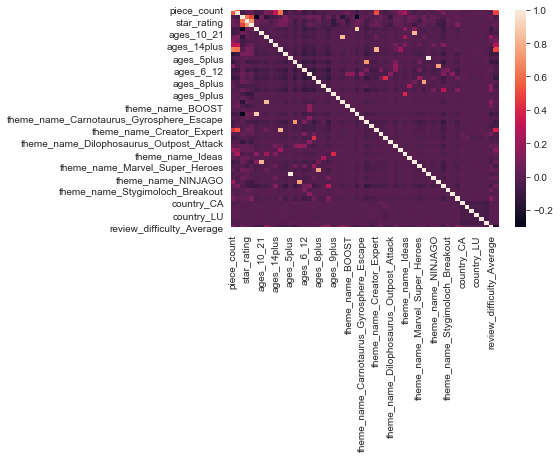

In [104]:
# Your code here - Code a way to identify multicollinearity
dfp = df[x2_cols]
sns.heatmap(dfp.corr());


In [139]:
corr = dfp.corr().abs().stack().reset_index().sort_values(0, ascending = False)
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr = corr.set_index('pairs').drop(['level_0', 'level_1'], axis=1)
corr.columns = ['cc']
corr[(corr.cc > 0.70) & (corr.cc < 1)].drop_duplicates()

,cc
pairs,
"(theme_name_BrickHeadz, ages_10plus)",0.891791
"(theme_name_Architecture, ages_12plus)",0.835991
"(theme_name_Creator_Expert, ages_16plus)",0.820996
"(ages_10_21, theme_name_MINDSTORMS)",0.819085
"(ages_8plus, theme_name_Minecraft)",0.762592
"(theme_name_SERIOUS_PLAY, ages_6plus)",0.751132
"(star_rating, val_star_rating)",0.728203
"(theme_name_City, ages_5_12)",0.716653


## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [141]:
# Your code here - Subset features based on multicollinearity
dfm = dfp.drop(['ages_10plus','ages_12plus', 'ages_16plus', 'ages_10_21', 
               'ages_6plus', 'val_star_rating', 'ages_5_12'], axis = 1)
print(len(dfp.columns), len(dfm.columns))

56 49


In [144]:
# Your code here - Refit model with subset features
x3_cols = dfm.columns

predictors = '+'.join(x3_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     968.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:43:27   Log-Likelihood:                -40925.
No. Observations:                8152   AIC:                         8.195e+04
Df Residuals:                    8103   BIC:                         8.229e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           60.9840      1.095     55.710      0.000      58.838      63.130
piece_count                                         78.6963      0.666    118.189      0.000      77.391      80.002
num_reviews                                          5.6186      0.609      9.220      0.000       4.424       6.813
play_star_rating                                     4.2996      0.625      6.879      0.000       3.074       5.525
star_rating                                         -7.1142      0.584    -12.178      0.000      -8.259      -5.969
ages_12_16                                         -61.6749      7.477     -8.249      0.000     -76.332     -47.018
ages_14plus                                         24.3713      3.521      6.922      0.000      17.470      31.273
ages_2_5                                            27.6032      1.868     14.773      0.000      23.941      31.266
ages_5plus                                          -3.0655      3.246     -0.945      0.345      -9.428       3.297
ages_6_12                                           -6.4821      1.414     -4.586      0.000      -9.253      -3.711
ages_7_12                                           -9.6190      1.951     -4.931      0.000     -13.443      -5.795
ages_7_14                                           -5.7711      1.663     -3.471      0.001      -9.030      -2.512
ages_8plus                                         -10.0797      4.491     -2.244      0.025     -18.884      -1.276
ages_8_12                                           -8.1737      2.548     -3.208      0.001     -13.168      -3.180
ages_8_14                                           -4.4809      1.649     -2.717      0.007      -7.713      -1.248
ages_9plus                                          26.8781     10.494      2.561      0.010       6.307      47.449
ages_9_12                                          -12.0220      6.217     -1.934      0.053     -24.208       0.164
theme_name_Architecture                            -10.9940      3.257     -3.375      0.001     -17.379      -4.609
theme_name_BOOST                                    76.9739     10.104      7.619      0.000      57.168      96.779
theme_name_Blues_Helicopter_Pursuit                 25.1355      9.995      2.515      0.012       5.543      44.728
theme_name_BrickHeadz                               -0.7460      2.568     -0.290      0.771      -5.780       4.288
theme_name_Carnotaurus_Gyrosphere_Escape            52.5803      8.652      6.077      0.000      35.620      69.540
theme_name_City                                      4.4341      1.544      2.872      0.004       1.408       7.460
theme_name_Classic                       

In [145]:
# remove new high pvalues
while True:
    
    pv = pd.DataFrame(model3.pvalues)
    pv = pv.drop('Intercept').reset_index().rename(columns= 
                                                {0:'p_value', 'index': 'cols'})
    x3_cols = list(pv[pv.p_value <= 0.05].cols)
    if len(x3_cols) == len(pv):
        break
    # Your code here - Refit the model
    predictors = '+'.join(x3_cols)
    formula = outcome + '~' + predictors
    model3 = ols(formula=formula, data=train).fit()
    
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1161.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:44:25   Log-Likelihood:                -40931.
No. Observations:                8152   AIC:                         8.194e+04
Df Residuals:                    8111   BIC:                         8.223e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           60.8734      0.963     63.218      0.000      58.986      62.761
piece_count                                         78.6922      0.663    118.728      0.000      77.393      79.991
num_reviews                                          5.6283      0.609      9.247      0.000       4.435       6.821
play_star_rating                                     4.3177      0.553      7.810      0.000       3.234       5.401
star_rating                                         -7.1124      0.542    -13.127      0.000      -8.174      -6.050
ages_12_16                                         -61.6732      7.456     -8.272      0.000     -76.289     -47.058
ages_14plus                                         24.8237      3.501      7.090      0.000      17.960      31.687
ages_2_5                                            27.8863      1.804     15.459      0.000      24.350      31.422
ages_6_12                                           -5.7099      1.363     -4.188      0.000      -8.382      -3.038
ages_7_12                                           -9.3309      1.926     -4.844      0.000     -13.107      -5.555
ages_7_14                                           -5.1030      1.589     -3.212      0.001      -8.217      -1.989
ages_8plus                                          -9.8749      4.491     -2.199      0.028     -18.678      -1.072
ages_8_12                                           -7.9946      2.509     -3.186      0.001     -12.913      -3.076
ages_8_14                                           -4.1726      1.625     -2.567      0.010      -7.359      -0.986
ages_9plus                                          27.1448     10.494      2.587      0.010       6.575      47.715
theme_name_Architecture                            -10.8794      3.161     -3.442      0.001     -17.076      -4.683
theme_name_BOOST                                    76.9154     10.102      7.614      0.000      57.113      96.718
theme_name_Blues_Helicopter_Pursuit                 25.2395      9.995      2.525      0.012       5.646      44.833
theme_name_Carnotaurus_Gyrosphere_Escape            52.6420      8.647      6.088      0.000      35.691      69.593
theme_name_City                                      4.4885      1.486      3.022      0.003       1.577       7.400
theme_name_Classic                                 -17.6536      2.522     -6.999      0.000     -22.598     -12.709
theme_name_Creator_Expert                          -86.9425      3.282    -26.494      0.000     -93.375     -80.510
theme_name_DIMENSIONS                               15.4898      3.053      5.074      0.000       9.505      21.474
theme_name_Dilophosaurus_Outpost_Attack  

In [150]:
dfp2 = dfm[x3_cols]
dfp2
#recheck for multicollinearity, if I thought there would be many more checks I'd 
#... add this to the while loop
corr = dfp2.corr().abs().stack().reset_index().sort_values(0, ascending = False)
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr = corr.set_index('pairs').drop(['level_0', 'level_1'], axis=1)
corr.columns = ['cc']
corr[(corr.cc > 0.70) & (corr.cc < 1)].drop_duplicates()

,cc
pairs,
"(theme_name_Minecraft, ages_8plus)",0.762592


In [152]:
dfm2 = dfp2.drop('ages_8plus', axis=1)
x4_cols = dfm2.columns

predictors = '+'.join(x4_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1190.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:49:59   Log-Likelihood:                -40933.
No. Observations:                8152   AIC:                         8.195e+04
Df Residuals:                    8112   BIC:                         8.223e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           60.7279      0.961     63.202      0.000      58.844      62.611
piece_count                                         78.6943      0.663    118.703      0.000      77.395      79.994
num_reviews                                          5.6127      0.609      9.220      0.000       4.419       6.806
play_star_rating                                     4.2710      0.553      7.729      0.000       3.188       5.354
star_rating                                         -7.0691      0.542    -13.052      0.000      -8.131      -6.007
ages_12_16                                         -61.7406      7.458     -8.279      0.000     -76.360     -47.122
ages_14plus                                         24.7570      3.502      7.069      0.000      17.892      31.622
ages_2_5                                            28.0109      1.803     15.532      0.000      24.476      31.546
ages_6_12                                           -5.6238      1.363     -4.126      0.000      -8.296      -2.952
ages_7_12                                           -9.2248      1.926     -4.790      0.000     -13.000      -5.449
ages_7_14                                           -4.7198      1.580     -2.988      0.003      -7.816      -1.623
ages_8_12                                           -7.9427      2.510     -3.165      0.002     -12.862      -3.023
ages_8_14                                           -4.0931      1.625     -2.518      0.012      -7.279      -0.907
ages_9plus                                          27.2517     10.496      2.596      0.009       6.677      47.826
theme_name_Architecture                            -10.8919      3.162     -3.445      0.001     -17.089      -4.694
theme_name_BOOST                                    76.9403     10.105      7.614      0.000      57.133      96.748
theme_name_Blues_Helicopter_Pursuit                 25.2733      9.998      2.528      0.011       5.675      44.871
theme_name_Carnotaurus_Gyrosphere_Escape            52.6382      8.649      6.086      0.000      35.683      69.593
theme_name_City                                      4.5805      1.485      3.084      0.002       1.669       7.492
theme_name_Classic                                 -17.5196      2.522     -6.946      0.000     -22.464     -12.576
theme_name_Creator_Expert                          -87.0002      3.282    -26.507      0.000     -93.434     -80.566
theme_name_DIMENSIONS                               15.2367      3.051      4.993      0.000       9.255      21.218
theme_name_Dilophosaurus_Outpost_Attack             36.8601      8.715      4.230      0.000      19.777      53.943
theme_name_Ghostbusters                  

In [165]:
y_hat_train = model4.predict(train)
rmse_train = mse(train.list_price, y_hat_train)**0.5
y_hat_test = model4.predict(test)
rmse_test = mse(test.list_price, y_hat_test)**0.5
print(f'Train RMSE: {rmse_train} \n Test RMSE: {rmse_test}')


Train RMSE: 36.68336376648838 
 Test RMSE: 37.12907433274278


## Check the Normality Assumption

Check whether the normality assumption holds for your model.

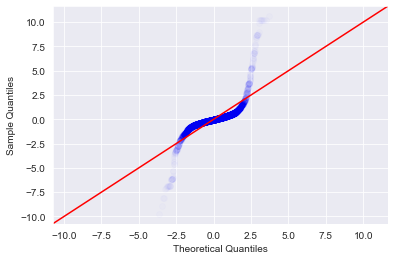

In [170]:
# Your code here - Check that the residuals are normally distributed
#qqplot
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True, 
                         alpha=0.01)
#Suffering from outliers

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
# Your code here - Check that the residuals are homoscedastic


> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
# Your code here - Check for outliers

In [ ]:
# Your code here
# Remove extreme outliers


# Rerun the model

In [ ]:
# Your code here - Check normality assumption

In [ ]:
# Your code here - Check the Homoscedasticity Assumption

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 